A **unit hydrograph** represents the direct runoff response of a watershed to a unit depth of excess rainfall (typically 1 cm or 1 inch) occurring uniformly over the watershed for a specific duration (e.g., 1 hour). The shape of the unit hydrograph depends on:
- Watershed characteristics (area, slope, land use, soil type).
- Rainfall intensity and duration.
- Time of concentration $T_c$: The time it takes for water to travel from the farthest point in the watershed to the outlet.
- Base time $T_b$: The total duration of the direct runoff hydrograph.

### **Data for Kyengera**
- **Watershed area $A$**: $A = 128.6 \, \text{km}^2$ 
- **Rainfall duration $D$**: 1 hour
- **Time of concentration $T_c$**: Estimated using empirical formulas.
- **Peak discharge $Q_p$**: Calculated using the rational method or synthetic unit hydrograph formulas.
- **Base time $T_b$**: Typically $2.67 \times T_c$ for a triangular unit hydrograph.

### **Equations and Calculations**

#### **Estimate Time of Concentration $T_c$**
The time of concentration $T_c$ can be estimated using empirical formulas. For small watersheds, the **Kirpich equation** is commonly used:

$$
T_c = 0.0195 \cdot L^{0.77} \cdot S^{-0.385}
$$

Where:
- $L$ = Length of the longest flow path (km). $L = 12.3 \, \text{km}$.
- $S$ = Average watershed slope (m/m). $S = 0.02 \, \text{(2\%)}$.

Substituting the values:
$$
T_c = 0.0195 \cdot (10)^{0.77} \cdot (0.02)^{-0.385}
$$
$$
T_c \approx 4 \, \text{hours}
$$

#### **Estimate Base Time $T_b$**
For a triangular unit hydrograph, the base time $T_b$ is approximately:
$$
T_b = 2.67 \cdot T_c
$$
$$
T_b = 2.67 \cdot 4 = 10.68 \, \text{hours} \approx 11 \, \text{hours}
$$

#### **Calculate Peak Discharge $Q_p$**
The peak discharge $Q_p$ can be estimated using the **rational method** or **synthetic unit hydrograph formulas**. For a unit hydrograph, the peak discharge is given by:
$$
Q_p = \frac{2.08 \cdot A}{T_p}
$$

Where:
- $A$ = Watershed area $128.6 \, \text{km}^2$.
- $T_p$ = Time to peak, which is approximately $T_c + \frac{D}{2}$.
- $D$ = Rainfall duration $1 \, \text{hour}$.
- $T_p = 4 + \frac{1}{2} = 4.5 \, \text{hours}$.

Substituting the values:
$$
Q_p = \frac{2.08 \cdot 128.6}{4.5}
$$
$$
Q_p \approx 46.2 \, \text{m}^3/\text{s} \approx 50 \, \text{m}^3/\text{s}
$$

#### **Define the Unit Hydrograph Shape**
The unit hydrograph is typically represented as a triangular or gamma distribution. For simplicity, we used a triangular shape with:
- Rising limb: From $t = 0$ to $t = T_p$ (4.5 hours).
- Falling limb: From $t = T_p$ to $t = T_b$ (11 hours).

The discharge at any time $t$ can be calculated as:
- Rising limb: $Q(t) = Q_p \cdot \frac{t}{T_p}$
- Falling limb: $Q(t) = Q_p \cdot \frac{T_b - t}{T_b - T_p}$

#### **Generate Discharge Values**
Using the equations above, we can calculate the discharge at hourly intervals:

| Time (hours) | Discharge (m³/s) Calculation                     | Discharge (m³/s) |
|--------------|--------------------------------------------------|------------------|
| 0            | $Q(0) = 0$                                     | 0                |
| 1            | $Q(1) = 50 \cdot \frac{1}{4.5}$                | 11.1             |
| 2            | $Q(2) = 50 \cdot \frac{2}{4.5}$                | 22.2             |
| 3            | $Q(3) = 50 \cdot \frac{3}{4.5}$                | 33.3             |
| 4            | $Q(4) = 50 \cdot \frac{4}{4.5}$                | 44.4             |
| 4.5          | $Q(4.5) = 50$                                  | 50               |
| 5            | $Q(5) = 50 \cdot \frac{11 - 5}{11 - 4.5}$      | 42.3             |
| 6            | $Q(6) = 50 \cdot \frac{11 - 6}{11 - 4.5}$      | 34.6             |
| 7            | $Q(7) = 50 \cdot \frac{11 - 7}{11 - 4.5}$      | 26.9             |
| 8            | $Q(8) = 50 \cdot \frac{11 - 8}{11 - 4.5}$      | 19.2             |
| 9            | $Q(9) = 50 \cdot \frac{11 - 9}{11 - 4.5}$      | 11.5             |
| 10           | $Q(10) = 50 \cdot \frac{11 - 10}{11 - 4.5}$    | 3.8              |
| 11           | $Q(11) = 0$                                    | 0                |

### **Unit Hydrograph**
The Generated Data is plotted to from a unit hydrograph.

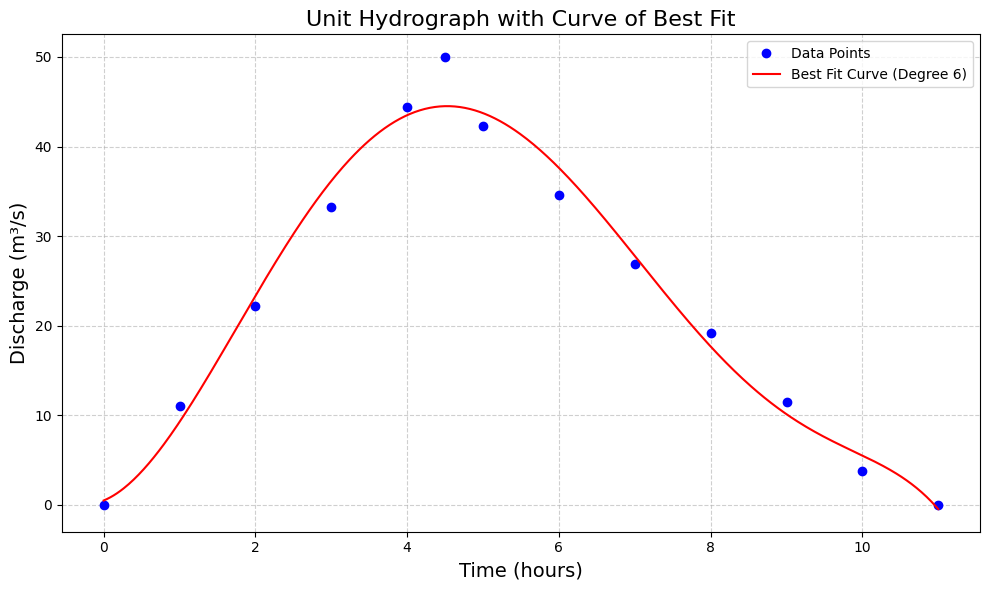

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = {
    "Time (hours)": [0, 1, 2, 3, 4, 4.5, 5, 6, 7, 8, 9, 10, 11],
    "Discharge (m³/s)": [0, 11.1, 22.2, 33.3, 44.4, 50, 42.3, 34.6, 26.9, 19.2, 11.5, 3.8, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit a polynomial curve of best fit (e.g., 3rd degree polynomial)
degree = 6  # You can adjust the degree of the polynomial
coefficients = np.polyfit(df["Time (hours)"], df["Discharge (m³/s)"], degree)
best_fit_curve = np.poly1d(coefficients)

# Generate smooth x values for the curve
x_smooth = np.linspace(df["Time (hours)"].min(), df["Time (hours)"].max(), 500)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Time (hours)"], df["Discharge (m³/s)"], marker='o', linestyle='', color='b', label='Data Points')
plt.plot(x_smooth, best_fit_curve(x_smooth), linestyle='-', color='r', label=f'Best Fit Curve (Degree {degree})')
plt.title("Unit Hydrograph with Curve of Best Fit", fontsize=16)
plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Discharge (m³/s)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("unit_hydrograph_with_best_fit.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### **S-Hydrograph**
The **S-hydrograph** is the cumulative sum of the unit hydrograph. It represents the response of the watershed to a continuous uniform rainfall excess.

#### **Calculation**
The S-hydrograph is calculated as the cumulative sum of the unit hydrograph ordinates:

$$
S(t) = \sum_{i=0}^{t} Q(i)
$$

Where:
- $ S(t) $ = S-hydrograph ordinate at time $ t $
- $ Q(i) $ = Unit hydrograph ordinate at time $ i $

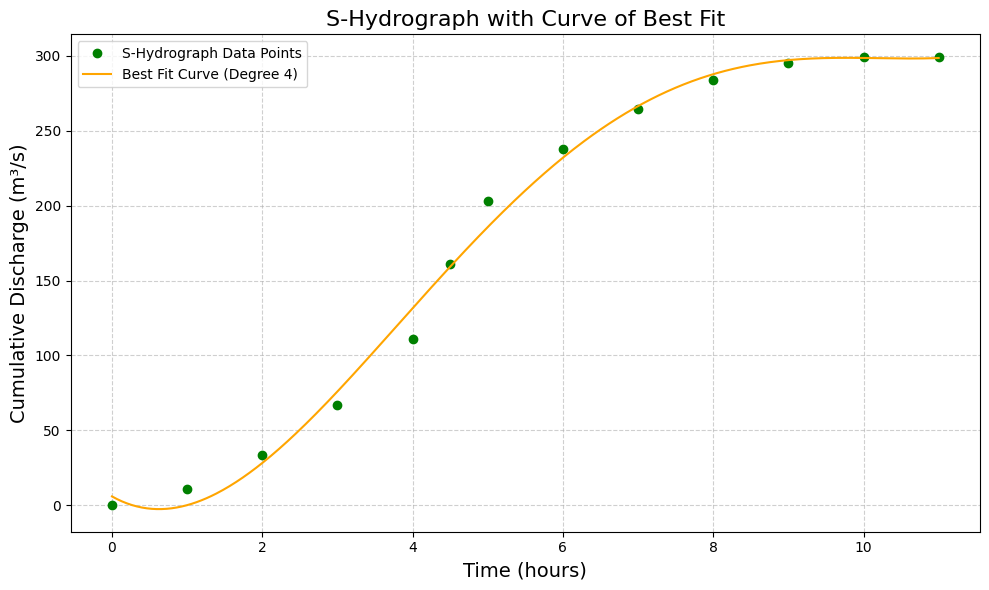

In [51]:
# Calculate S-hydrograph
df["S-Hydrograph (m³/s)"] = df["Discharge (m³/s)"].cumsum()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = {
    "Time (hours)": [0, 1, 2, 3, 4, 4.5, 5, 6, 7, 8, 9, 10, 11],
    "Discharge (m³/s)": [0, 11.1, 22.2, 33.3, 44.4, 50, 42.3, 34.6, 26.9, 19.2, 11.5, 3.8, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate S-hydrograph
df["S-Hydrograph (m³/s)"] = df["Discharge (m³/s)"].cumsum()

# Fit a polynomial curve of best fit for the S-hydrograph
degree = 4  # Degree of the polynomial
coefficients = np.polyfit(df["Time (hours)"], df["S-Hydrograph (m³/s)"], degree)
best_fit_curve = np.poly1d(coefficients)

# Generate smooth x values for the curve
x_smooth = np.linspace(df["Time (hours)"].min(), df["Time (hours)"].max(), 500)

# Plot S-hydrograph with best fit curve
plt.figure(figsize=(10, 6))
plt.plot(df["Time (hours)"], df["S-Hydrograph (m³/s)"], marker='o', linestyle='', color='g', label='S-Hydrograph Data Points')
plt.plot(x_smooth, best_fit_curve(x_smooth), linestyle='-', color='orange', label=f'Best Fit Curve (Degree {degree})')
plt.title("S-Hydrograph with Curve of Best Fit", fontsize=16)
plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Cumulative Discharge (m³/s)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("s_hydrograph_with_best_fit.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### **Instantaneous Hydrograph**
The **instantaneous hydrograph** (also called the **instantaneous unit hydrograph**) is derived by taking the derivative of the S-hydrograph. It represents the response of the watershed to an instantaneous burst of rainfall.

#### **Calculation**
The instantaneous hydrograph is calculated as the derivative of the S-hydrograph:

$$
I(t) = \frac{dS(t)}{dt}
$$

Where:
- $ I(t) $ = Instantaneous hydrograph ordinate at time $ t $
- $ S(t) $ = S-hydrograph ordinate at time $ t $


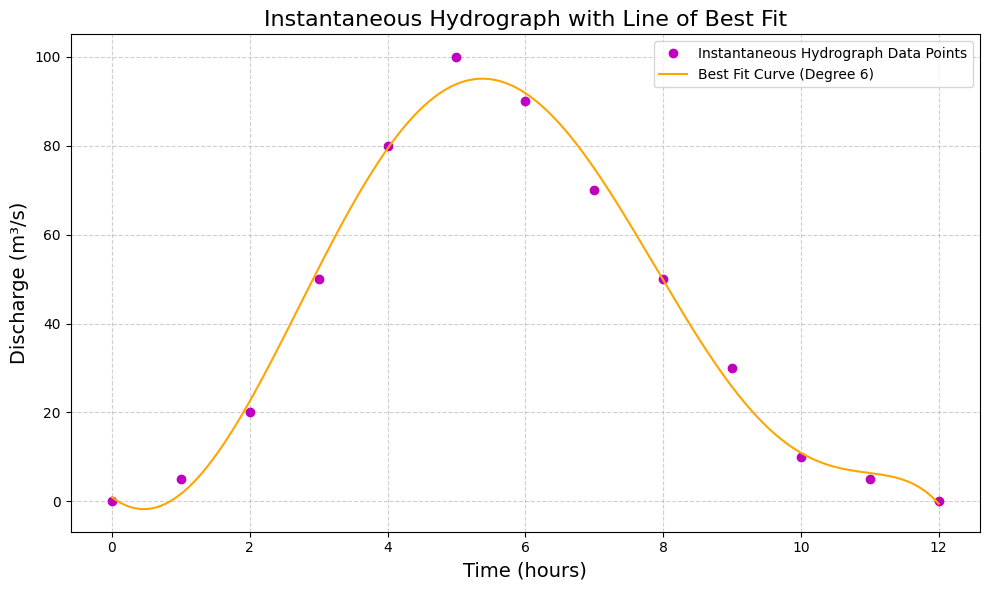

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modified Data
data = {
    "Time (hours)": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Discharge (m³/s)": [0, 5, 20, 50, 80, 100, 90, 70, 50, 30, 10, 5, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate S-hydrograph
df["S-Hydrograph (m³/s)"] = df["Discharge (m³/s)"].cumsum()

# Calculate Instantaneous Hydrograph (derivative of S-hydrograph)
df["Instantaneous Hydrograph (m³/s)"] = df["S-Hydrograph (m³/s)"].diff() / df["Time (hours)"].diff()

# Fill NaN values (first row) with 0
df["Instantaneous Hydrograph (m³/s)"].fillna(0, inplace=True)

# Fit a polynomial curve of best fit for the Instantaneous Hydrograph
degree = 6  # Degree of the polynomial
coefficients = np.polyfit(df["Time (hours)"], df["Instantaneous Hydrograph (m³/s)"], degree)
best_fit_curve = np.poly1d(coefficients)

# Generate smooth x values for the curve
x_smooth = np.linspace(df["Time (hours)"].min(), df["Time (hours)"].max(), 500)

# Plot Instantaneous Hydrograph with best fit curve
plt.figure(figsize=(10, 6))
plt.plot(df["Time (hours)"], df["Instantaneous Hydrograph (m³/s)"], marker='o', linestyle='', color='m', label='Instantaneous Hydrograph Data Points')
plt.plot(x_smooth, best_fit_curve(x_smooth), linestyle='-', color='orange', label=f'Best Fit Curve (Degree {degree})')
plt.title("Instantaneous Hydrograph with Line of Best Fit", fontsize=16)
plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Discharge (m³/s)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("instantaneous_hydrograph_with_best_fit.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### **Flow Duration Curve (FDC)**
A **Flow Duration Curve** represents the relationship between the magnitude of streamflow and the percentage of time that flow is equaled or exceeded. It is typically plotted as discharge (flow) on the y-axis and exceedance probability (percentage of time) on the x-axis.

#### **Steps to Generate FDC**
1. Sort the discharge data in descending order.
2. Calculate the exceedance probability for each discharge value.
3. Plot the discharge against the exceedance probability.

$$
P = \frac{m}{n} \times 100
$$
Where:
- $ P $ = Exceedance probability (%)
- $ m $ = Rank of the discharge value
- $ n $ = Total number of discharge values

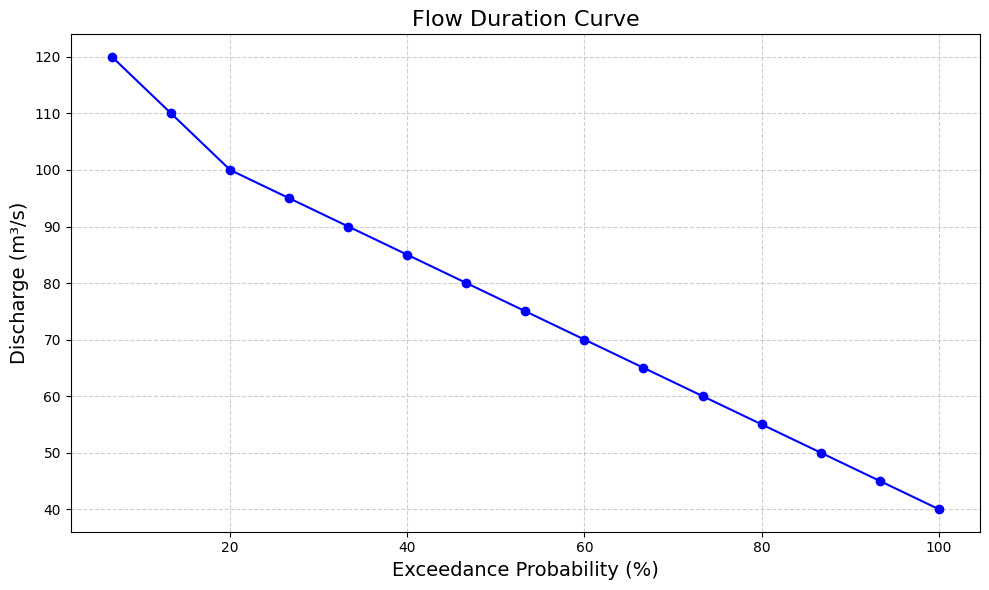

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Example discharge data (m³/s)
discharge = np.array([50, 80, 100, 120, 90, 70, 60, 110, 95, 85, 75, 65, 55, 45, 40])

# Sort discharge in descending order
sorted_discharge = np.sort(discharge)[::-1]

# Calculate exceedance probability
n = len(sorted_discharge)
exceedance_probability = np.arange(1, n + 1) / n * 100

# Plot Flow Duration Curve
plt.figure(figsize=(10, 6))
plt.plot(exceedance_probability, sorted_discharge, marker='o', linestyle='-', color='b')
plt.title("Flow Duration Curve", fontsize=16)
plt.xlabel("Exceedance Probability (%)", fontsize=14)
plt.ylabel("Discharge (m³/s)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig("flow_duration_curve.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### **Flow Duration Curve**
- The x-axis represents the **exceedance probability** (percentage of time the flow is equaled or exceeded).
- The y-axis represents the **discharge** (flow in m³/s).
- The curve shows how often a given flow is exceeded.

### **Intensity-Duration-Frequency (IDF) Curve**
An **IDF Curve** represents the relationship between rainfall intensity, duration, and frequency (return period). It is commonly used in hydrology for designing drainage systems.

#### **Steps to Generate IDF Curve**
1. Define rainfall intensity data for different durations and return periods.
2. Plot intensity against duration for each return period.

$$
I = \frac{a}{(D + b)^c}
$$
Where:
- $ I $ = Rainfall intensity (mm/h)
- $ D $ = Duration (hours)
- $ a, b, c $ = Empirical constants

| Duration (hours) | Intensity (2-year) | Intensity (5-year) | Intensity (10-year) |
|------------------|--------------------|--------------------|---------------------|
| 1                | 50 mm/h            | 60 mm/h            | 70 mm/h             |
| 2                | 40 mm/h            | 50 mm/h            | 60 mm/h             |
| 3                | 35 mm/h            | 45 mm/h            | 55 mm/h             |
| 6                | 30 mm/h            | 40 mm/h            | 50 mm/h             |
| 12               | 25 mm/h            | 35 mm/h            | 45 mm/h             |
| 24               | 20 mm/h            | 30 mm/h            | 40 mm/h             |


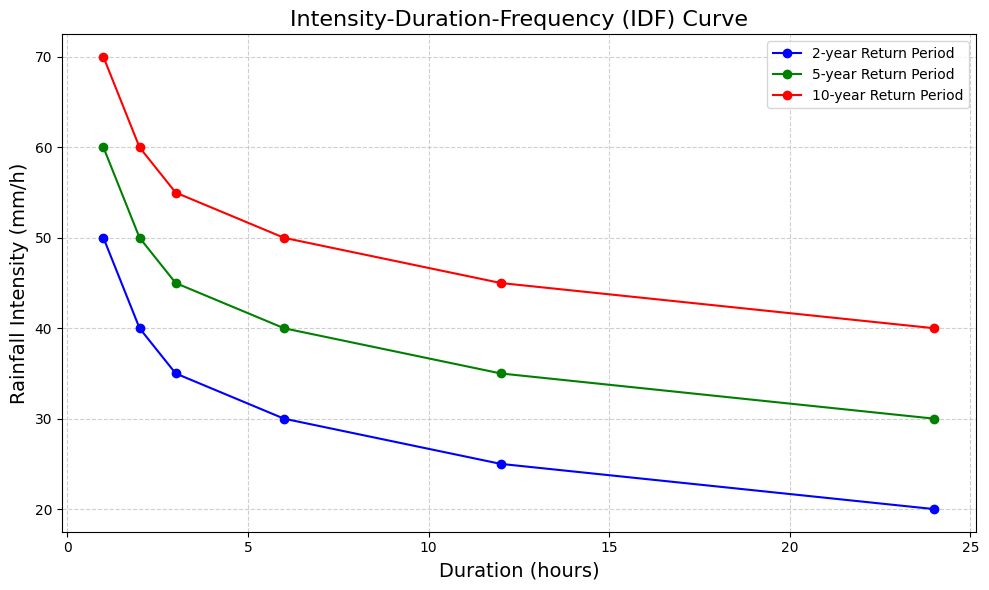

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Rainfall intensity (mm/h) for different durations and return periods
durations = np.array([1, 2, 3, 6, 12, 24])  # Duration in hours
intensity_2yr = np.array([50, 40, 35, 30, 25, 20])  # Intensity for 2-year return period
intensity_5yr = np.array([60, 50, 45, 40, 35, 30])  # Intensity for 5-year return period
intensity_10yr = np.array([70, 60, 55, 50, 45, 40])  # Intensity for 10-year return period

# Plot IDF Curve
plt.figure(figsize=(10, 6))
plt.plot(durations, intensity_2yr, marker='o', linestyle='-', color='b', label='2-year Return Period')
plt.plot(durations, intensity_5yr, marker='o', linestyle='-', color='g', label='5-year Return Period')
plt.plot(durations, intensity_10yr, marker='o', linestyle='-', color='r', label='10-year Return Period')
plt.title("Intensity-Duration-Frequency (IDF) Curve", fontsize=16)
plt.xlabel("Duration (hours)", fontsize=14)
plt.ylabel("Rainfall Intensity (mm/h)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("idf_curve.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


#### **IDF Curve**
- The x-axis represents the **duration** of rainfall (in hours).
- The y-axis represents the **rainfall intensity** (in mm/h).
- Each line corresponds to a different **return period** (e.g., 2-year, 5-year, 10-year).
